In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

C:\Users\raghu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("C:\\Users\\raghu\\Downloads\\airplane-passengers.csv")

In [4]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
#convert the datatype of the month column from object to datetime datatype
data['Month']=pd.to_datetime(data["Month"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
 #note:if you have missing value in the column then you cannot change the datatype of the column

In [10]:
data["year"]=data['Month'].dt.year

In [11]:
data["month"]=data["Month"].dt.month

In [12]:
data["day"]=data["Month"].dt.day

In [13]:
#so you need to convert into the datetime data type to get the month ,day ,year 
# it is not mandatory to create the  columns

In [14]:
data

,Month,Passengers,year,month,day
0,1949-01-01,112,1949,1,1
1,1949-02-01,118,1949,2,1
2,1949-03-01,132,1949,3,1
3,1949-04-01,129,1949,4,1
4,1949-05-01,121,1949,5,1
...,...,...,...,...,...
139,1960-08-01,606,1960,8,1
140,1960-09-01,508,1960,9,1
141,1960-10-01,461,1960,10,1
142,1960-11-01,390,1960,11,1


In [15]:
# in time series data,we need to make the datetime column as the index of the data because to select the values
data.set_index('Month',inplace=True)

In [16]:
data.head()

,Passengers,year,month,day
Month,,,,
1949-01-01,112,1949,1,1
1949-02-01,118,1949,2,1
1949-03-01,132,1949,3,1
1949-04-01,129,1949,4,1
1949-05-01,121,1949,5,1


In [17]:
data.columns

Index(['Passengers', 'year', 'month', 'day'], dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
 1   year        144 non-null    int64
 2   month       144 non-null    int64
 3   day         144 non-null    int64
dtypes: int64(4)
memory usage: 5.6 KB


In [19]:
 data.index.name=None

In [20]:
data.head()

,Passengers,year,month,day
1949-01-01,112,1949,1,1
1949-02-01,118,1949,2,1
1949-03-01,132,1949,3,1
1949-04-01,129,1949,4,1
1949-05-01,121,1949,5,1


In [21]:
data.loc['1949-01-01']

Passengers     112
year          1949
month            1
day              1
Name: 1949-01-01 00:00:00, dtype: int64

In [22]:
data[2:5]

,Passengers,year,month,day
1949-03-01,132,1949,3,1
1949-04-01,129,1949,4,1
1949-05-01,121,1949,5,1


In [23]:
data['1949-02-01':'1957-02-01']

,Passengers,year,month,day
1949-02-01,118,1949,2,1
1949-03-01,132,1949,3,1
1949-04-01,129,1949,4,1
1949-05-01,121,1949,5,1
1949-06-01,135,1949,6,1
...,...,...,...,...
1956-10-01,306,1956,10,1
1956-11-01,271,1956,11,1
1956-12-01,306,1956,12,1
1957-01-01,315,1957,1,1


In [24]:
# to convert the datatype of any column we can use astype function
#data[].astype(int or float )

In [25]:
# date time format
#yyyy-mm-dd hh:min:seconds

In [28]:
data.drop(columns=['year','month','day'],inplace=True)

In [29]:
data

,Passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


<AxesSubplot:>

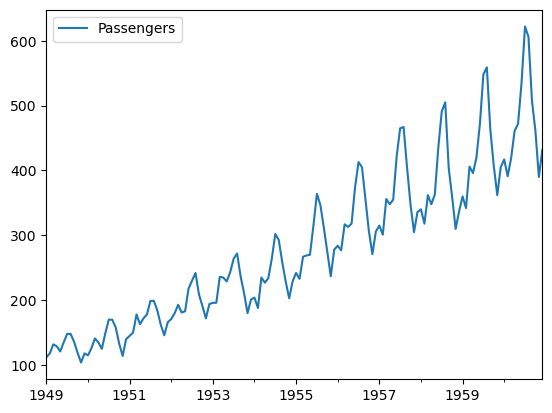

In [30]:
data.plot()

In [31]:
data.columns

Index(['Passengers'], dtype='object')

In [32]:
# moving average
mean_value=data.rolling(window=12).mean() #taking the average of last 11 values
mean_value

,Passengers
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333
1960-11-01,473.916667


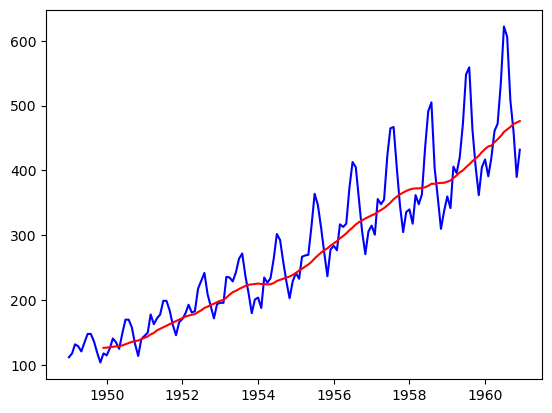

In [37]:
plt.plot(data,color='blue')
plt.plot(mean_value,color='red')

Before making a time series model,we need to make sure that the time series is stationery(only seasonality).if the data is not stationery ,we need to make it stationary by differencing the data or by taking the log of the data

Non stationary in time series could be because of the following reasons:
Presence of trend

presence of auto correlation

presence of heteroscedasticity

we can identify non-stationary time series data using Augmented Dicky -Fuller test

In [39]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data["Passengers"])

In [41]:
result[1] #This is called the p value of the test
# if the p value is less than 0.05 then the data is stationary otherwise non stationary

0.991880243437641

# Make the data stationary

In [48]:
first_log=np.log(data)

In [49]:
first_log

,Passengers
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398
1960-11-01,5.966147


In [50]:
mean_log=first_log.rolling(window=12).mean()

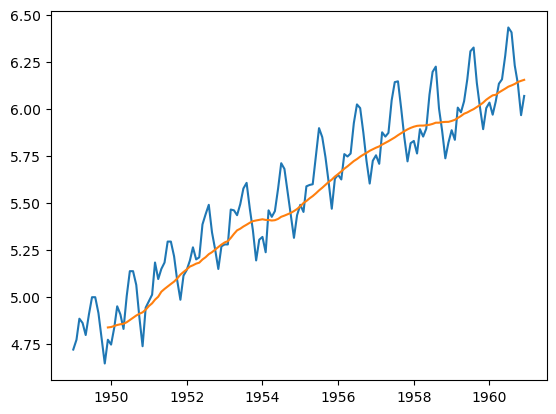

In [52]:
plt.plot(first_log)
plt.plot(mean_log)

In [53]:
result_2=adfuller(first_log["Passengers"])

In [55]:
result_2[1] #data has become little flatter but this is not that much flatter to give to algorithm

0.4223667747703902

# Differencing of the data to make it stationary

In [56]:
new_data=first_log-mean_log

In [57]:
new_data

,Passengers
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230
1960-11-01,-0.182690


In [58]:
new_data.dropna(inplace=True)

In [59]:
new_data

,Passengers
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230
1960-11-01,-0.182690


In [60]:
result_3=adfuller(new_data["Passengers"])

In [63]:
result_3[1] # the data has become stationary

0.022234630001242737

  Since the p-value now is <0.05 which is what we wanted , we can call that the data ha become stationary and we can use this data for forecasting the further value

In [66]:
differenced_data=data["Passengers"].diff()
differenced_data.dropna(inplace=True)

In [67]:
differenced_data

1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 143, dtype: float64

<AxesSubplot:>

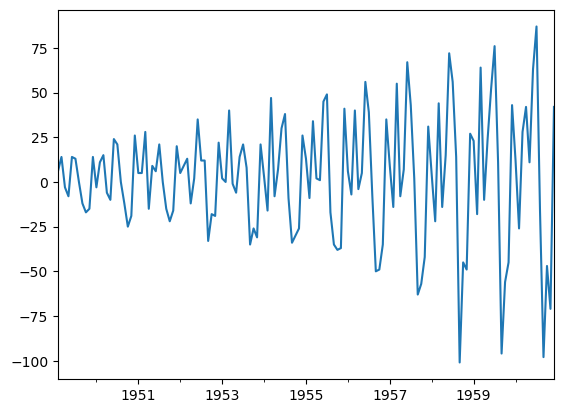

In [68]:
differenced_data.plot()

<AxesSubplot:>

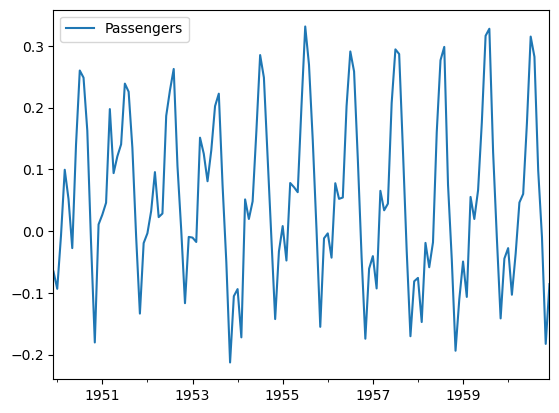

In [69]:
new_data.plot()

In [73]:
result_4=adfuller(data["Passengers"].diff().dropna())

In [75]:
result_4[1]

0.054213290283826474

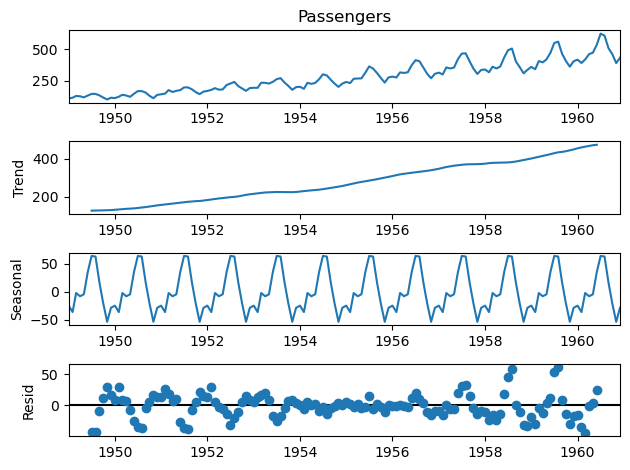

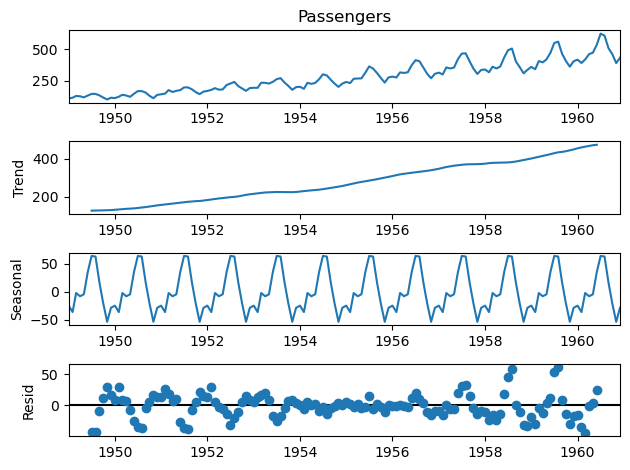

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data["Passengers"]).plot()

   # ARIMA Model For training the data and Forecasting

In [80]:
from statsmodels.tsa.arima.model import ARIMA


In [82]:
new_data.shape

(133, 1)

In [84]:
train_data=new_data.iloc[0:120]["Passengers"]
test_data=new_data.iloc[120:]["Passengers"]

In [88]:
arima_model=ARIMA(train_data,order=(1,0,2))
trained_model=arima_model.fit()

C:\Users\raghu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\raghu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\raghu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [89]:
new_data['predicted']=trained_model.predict(start=len(train_data),end=len(new_data)-1,dynamic=True)

In [90]:
new_data

,Passengers,predicted
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.053610
1960-09-01,0.098235,0.053705
1960-10-01,-0.009230,0.053746
1960-11-01,-0.182690,0.053763


<AxesSubplot:>

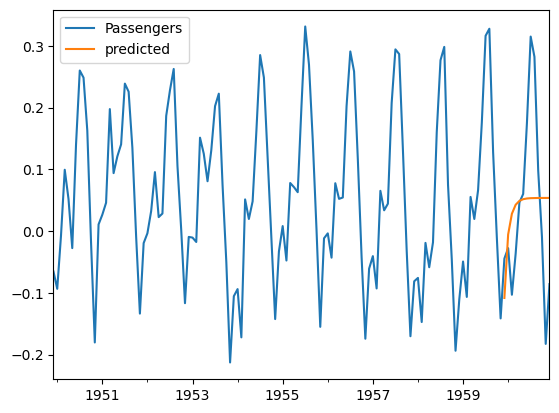

In [92]:
new_data.plot()

In [93]:
#Arima has failed in this

# SARIMA MODEL for training and forecasting purpose

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [97]:
sarima_model=SARIMAX(train_data,seasonal_order=(1,0,2,12))

C:\Users\raghu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\raghu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [99]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
s_model=sarima_model.fit()

In [110]:
new_data['predicted']=s_model.predict(start=len(train_data),end=len(new_data)-1,dynamic=True)

<AxesSubplot:>

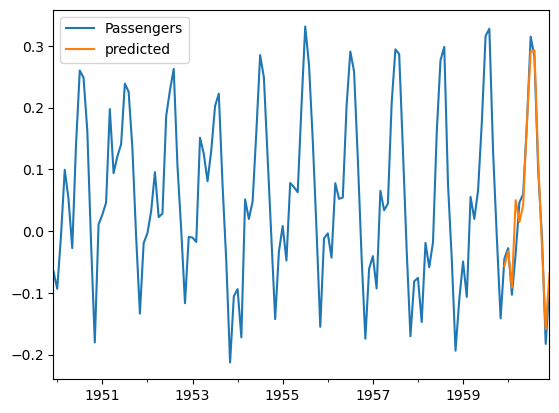

In [111]:
new_data.plot()

In [ ]:
# sarima model has succeded in forecasting

# Forecasting the values using SARIMA Model

In [113]:
forecasted_result=s_model.forecast(steps=60)

<AxesSubplot:>

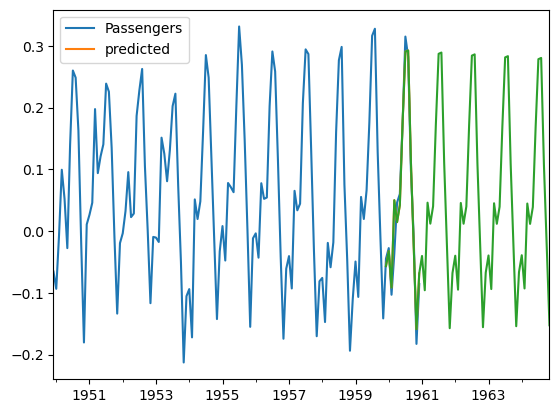

In [116]:
new_data.plot()
forecasted_result.plot()

<AxesSubplot:>

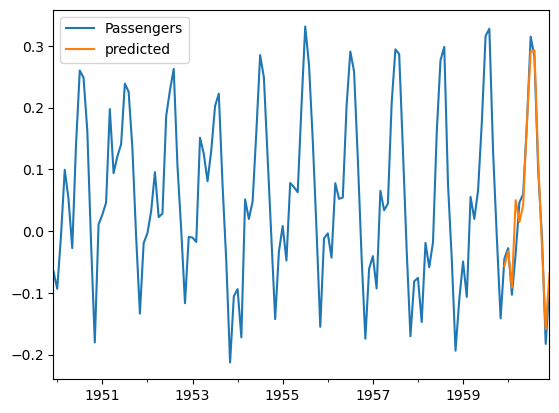